# Gather

In [1]:
#Import libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
import timeit
from timeit import default_timer as timer
import os

In [2]:
#Read data
df_1 = pd.read_csv("twitter-archive-enhanced-2.csv")

In [3]:
#starting with collecting the Tweet data
#Query Twitter for each tweet in the Twitter archive, save JSON in a .txt file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#Tweet IDs to gather additional data with Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#Query Twitter for JSON data for each tweet ID
count = 0
fails_dict = {}
start = timer()

#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #Loop takes ~20 minutes to run due to Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

#Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
data = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        data = data.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', \
                                                 'favorite_count']))
data = data.reset_index(drop=True)

#save DataFram to .csv file to be read after hiding Twitter API keys
data.to_csv('tweet_data', index=False)

#confirm
data.head()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7538,35572
1,892177421306343426,5592,30754
2,891815181378084864,3705,23131
3,891689557279858688,7713,38854
4,891327558926688256,8320,37134
5,891087950875897856,2792,18731
6,890971913173991426,1810,10878
7,890729181411237888,16867,59973
8,890609185150312448,3844,25751
9,890240255349198849,6560,29402


In [3]:
tweet_data = pd.read_csv("tweet_data.csv")

In [4]:
#download image prediction file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#save dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

# Assess

In [5]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df_1[(df_1['rating_denominator'] < 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [9]:
df_1[(df_1['rating_denominator'] > 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [10]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Scout          6
Oscar          6
Leo            6
Dave           6
Jack           6
Jax            6
Milo           6
Stanley        6
Rusty          6
Bella          6
Koda           6
Bentley        5
            ... 
Leonidas       1
Naphaniel      1
Rambo          1
Sprout         1
Rolf           1
Chloe          1
Augie          1
Puff           1
Lucky          1
Kobe           1
Tonks          1
Rascal         1
Stella         1
Kaiya          1
Noosh          1
Godzilla       1
Cermet         1
Ginger         1
Amber          1
Leonard        1
Bode           1
Raphael        1
Alf            1
Eriq           1
Horace         1
Terrenth       1
Lulu           1
Spanky        

In [11]:
df_1[(df_1['name'] == 'an')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [12]:
sum(df_1.retweeted_status_timestamp.isnull())

2175

In [13]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
df_1.loc[(df_1[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [18]:
df_1[df_1.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7538,35572
1,892177421306343426,5592,30754
2,891815181378084864,3705,23131
3,891689557279858688,7713,38854
4,891327558926688256,8320,37134
5,891087950875897856,2792,18731
6,890971913173991426,1810,10878
7,890729181411237888,16867,59973
8,890609185150312448,3844,25751
9,890240255349198849,6560,29402


In [20]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [21]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2650.063063,7433.105963
std,6.823170e+16,4481.625185,11542.526608
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,537.000000,1293.000000
50%,7.182469e+17,1239.000000,3231.000000
75%,7.986692e+17,3079.000000,9099.500000
max,8.924206e+17,76135.000000,153515.000000


In [22]:
tweet_data.retweet_count.sort_values()

279         1
1271        2
262         2
328         2
109         3
29          4
1056        6
54          7
411        10
63         10
2314       11
2273       13
178        15
172        17
1499       18
2294       18
203        19
2164       21
393        24
180        24
1213       25
593        26
943        27
2235       28
2199       29
863        30
2234       31
2302       31
2312       32
273        33
        ...  
731     18207
432     18930
431     18930
296     20552
915     20552
1053    20732
512     20912
434     20912
636     21160
1601    21160
148     21436
639     22262
606     23655
111     24142
443     26999
289     26999
162     28110
848     28757
158     28757
1805    29775
1741    30782
129     32338
520     34722
433     36763
430     36763
65      39904
397     42911
517     55514
1055    56621
1015    76135
Name: retweet_count, Length: 2331, dtype: int64

In [23]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [27]:
all_columns = pd.Series(list(df_1) + list(tweet_data) + list(image_prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

## Quality

#### *`df_1` table*
- tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id columns are stored as int but not needed for any mathematical operation
- timestamp is not datetime
- tweet 313	835246439529840640	has a denominator of zero and two others have low denominators, possibly erroneous
- some tweets have significantly larger numerators, possibly erroneous
- within tweet text, numbers with decimals found; dtype for rating_numerator and rating_denominator should be float
- rows with values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not original tweets
- incorrect/absurd names values
- some dogs are simultaneously in multiple stages, but it's not reflected in the columns

#### *`tweet_data` table*
- tweet_id stored as int, should be string

#### *`image_prediction` table*
- tweet_id stored as int, should be string
- not all predictions are dogs
- inconsistent capitalization in p1, p2, p3

## Tidiness

- Floofer/Doggo/Puppo/Pupper columns:  column headers are values, not variable names
- expanded_urls sometimes have more than one url
- a single observational unit (tweet) is stored in multiple tables

# Clean

In [5]:
#create copies of the dataframes to work with
df_1_clean = df_1.copy()
tweet_data_clean = tweet_data.copy()
image_prediction_clean = image_prediction.copy()

#### `df_1` table: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id columns are stored as int but not needed for any mathematical operation

##### Define
Convert datatype for described columns to string with `.astype(str)`.

##### Code

In [6]:
df_1_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id']] = df_1_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id']].astype(str)

##### Test

In [7]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


##### `df_1` table:  timestamp is not datetime

##### Define
Convert datatype for described columns to datetime with `pd.to_datetime`.

##### Code

In [8]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

##### Test

In [9]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

##### `df_1` table:  tweet 313	835246439529840640	has a denominator of zero and two others have low denominators, possibly erroneous, some tweets have significantly larger numerators, possibly erroneous, and within tweet text, numbers with decimals found; dtype for rating_numerator and rating_denominator should be float

##### Define
Re-do the rank extractions from tweet text using regular expressions and `str.extract`, and store as float datatype.  Filter out absurd ratings.

##### Code

In [10]:
#get the numerator
ratings_numerator = df_1_clean.text.str.extract('((?:\d+\.)?\d+)', expand=True)
ratings_numerator.columns = ['numerator']
ratings_numerator['numerator'] = ratings_numerator['numerator'].astype(float)

#get the denominator
ratings_denominator = df_1_clean.text.str.extract('\/(\d+)', expand=True)
ratings_denominator.columns = ['denominator']
ratings_denominator['denominator'] = ratings_denominator['denominator'].astype(float)

#create the rating, drop the old columns
df_1_clean['numerator'] = ratings_numerator['numerator']
df_1_clean['denominator'] = ratings_denominator['denominator']
df_1_clean['rating'] = df_1_clean['numerator']/df_1_clean['denominator']
df_1_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)


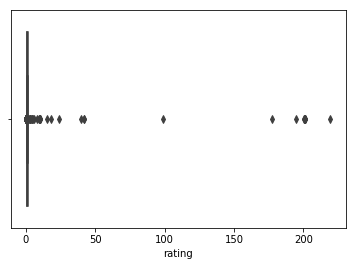

In [11]:
sns.boxplot(x = 'rating', data = df_1_clean);

In [12]:
#drop the absurd values 
df_1_clean = df_1_clean[df_1_clean['rating'] <= 2]
df_1_clean = df_1_clean[df_1_clean['rating'] > 0]


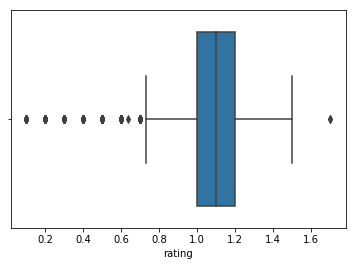

In [13]:
sns.boxplot(x = 'rating', data = df_1_clean);

In [14]:
#drop the outlier values 
df_1_clean = df_1_clean[df_1_clean['rating'] <= 1.6]
df_1_clean = df_1_clean[df_1_clean['rating'] > .7]

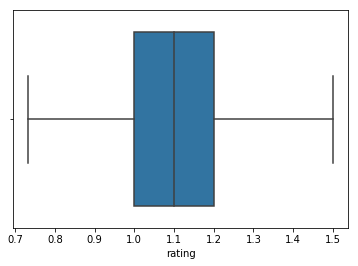

In [15]:
sns.boxplot(x = 'rating', data = df_1_clean);

In [16]:
df_1_clean.drop(['numerator', 'denominator'], axis=1, inplace=True)

##### Test

In [17]:
df_1_clean.describe()

,rating
count,2101.000000
mean,1.115669
std,0.144483
min,0.733333
25%,1.000000
50%,1.100000
75%,1.200000
max,1.500000


##### `df_1` table:  rows with values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are not original tweets

##### Define
Use `isnull` to filter out unoriginal tweets, then drop the retweet columns.

##### Code

In [18]:
#keep orignal tweets
df_1_clean = df_1_clean[pd.isnull(df_1_clean['retweeted_status_timestamp'])]

#drop retweet columns
df_1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'in_reply_to_status_id'], axis=1, inplace=True)

##### Test

In [19]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         1930 non-null object
timestamp        1930 non-null datetime64[ns]
source           1930 non-null object
text             1930 non-null object
expanded_urls    1887 non-null object
name             1930 non-null object
doggo            1930 non-null object
floofer          1930 non-null object
pupper           1930 non-null object
puppo            1930 non-null object
rating           1930 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 180.9+ KB


##### `df_1` incorrect/absurd names values

##### Define
Set name column values as `nan` wherever there is no valid name in title case.  Drop rows without valid names.

##### Code

In [20]:
mask = df_1_clean.name.str.islower()
column_name = 'name'
df_1_clean.loc[mask, column_name] = np.nan

In [21]:
name_remove = ['None', 'O']

# keep the rows where the `name` value IS NOT in the list or null
df_1_clean = df_1_clean[~df_1_clean.name.isin(name_remove)]
df_1_clean = df_1_clean[df_1_clean.name.notnull()]

##### Test

In [22]:
df_1_clean.name.value_counts()

Lucy            11
Oliver          10
Cooper          10
Charlie         10
Penny            9
Tucker           8
Lola             8
Winston          8
Sadie            7
Daisy            7
Koda             6
Oscar            6
Stanley          6
Bailey           6
Toby             6
Bo               6
Jax              6
Scout            5
Louis            5
Bella            5
Milo             5
Leo              5
Bentley          4
Gary             4
Chester          4
Clarence         4
Sammy            4
Dave             4
Winnie           4
Maggie           4
                ..
Flávio           1
Levi             1
Dudley           1
Franq            1
Monster          1
Severus          1
Longfellow       1
Brudge           1
Lilah            1
Sweets           1
Tater            1
Milky            1
Arlo             1
Julius           1
Cleopatricia     1
Dex              1
Tebow            1
Rufio            1
Pilot            1
Tyrus            1
Clarkus          1
Augie       

In [23]:
df_1_clean.name.isna().sum()

0

##### `df_1` table: some dogs are simultaneously in multiple stages, but it's not reflected in the columns

##### Define
Search the tweet text again for stages, store in the columns, then collapse into one column.

In [24]:
df_1_clean['pupper'] = df_1_clean['text'].str.extract('([Pp]upper)', expand = True)
df_1_clean['pupper'] = df_1_clean['pupper'].str.title()
df_1_clean['puppo'] = df_1_clean['text'].str.extract('([Pp]uppo)', expand = True)
df_1_clean['puppo'] = df_1_clean['puppo'].str.title()
df_1_clean['doggo'] = df_1_clean['text'].str.extract('([Dd]oggo)', expand = True)
df_1_clean['doggo'] = df_1_clean['doggo'].str.title()
df_1_clean['floofer'] = df_1_clean['text'].str.extract('([Ff]loofer)', expand = True)
df_1_clean['floofer'] = df_1_clean['floofer'].str.title()

# handle NaN
df_1_clean['doggo'] = df_1_clean.doggo.replace(np.nan, '', regex=True)
df_1_clean['floofer'] = df_1_clean.floofer.replace(np.nan, '', regex=True)
df_1_clean['pupper'] = df_1_clean.pupper.replace(np.nan, '', regex=True)
df_1_clean['puppo'] = df_1_clean.puppo.replace(np.nan, '', regex=True)

# merge into column
df_1_clean['dog_stages'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

# handle multiple stages
df_1_clean.loc[df_1_clean.dog_stages == 'DoggoPupper', 'dog_stages'] = 'Doggo,Pupper'

# address missing values
df_1_clean.loc[df_1_clean.dog_stages == '', 'dog_stages'] = np.nan

# drop former stage columns
df_1_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

##### Test

In [25]:
df_1_clean.dog_stages.value_counts()

Pupper          115
Doggo            40
Puppo            20
Floofer           5
Doggo,Pupper      4
Name: dog_stages, dtype: int64

##### Code

In [26]:
df_1_clean[['dog_stage_1', 'dog_stage_2']] = df_1_clean.dog_stages.str.split(",",expand=True)
df_1_clean.drop(['dog_stages'], axis=1, inplace=True)

##### Test

In [27]:
print(df_1_clean.dog_stage_1.value_counts())
print(df_1_clean.dog_stage_2.value_counts())

Pupper     115
Doggo       44
Puppo       20
Floofer      5
Name: dog_stage_1, dtype: int64
Pupper    4
Name: dog_stage_2, dtype: int64


##### `tweet_data` table: tweet_id stored as int, should be string

##### Define
Convert datatype for described column to string with `.astype(str)`.

##### Code

In [28]:
tweet_data_clean[['tweet_id']] = tweet_data_clean[['tweet_id']].astype(str)

##### Test

In [29]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### `image_prediction` table: tweet_id stored as int, should be string

##### Define
Convert datatype for described column to string with `.astype(str)`.

##### Code

In [30]:
image_prediction_clean[['tweet_id']] = image_prediction_clean[['tweet_id']].astype(str)

##### Test

In [31]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### `image_prediction` table: not all predictions are dogs

##### Define
Eliminate rows where there is no valid dog prediction and keep only the most likely dog breed prediction.

##### Code

In [32]:
not_dogs = image_prediction_clean[(image_prediction_clean['p1_dog'] == False) & (image_prediction_clean['p2_dog'] == False) & (image_prediction_clean['p3_dog'] == False)].index
image_prediction_clean.drop(not_dogs, inplace = True)

##### Test

In [33]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Code

In [34]:
# create list of conditions
conditions = [
    (image_prediction_clean['p1_dog'] == True),
    (image_prediction_clean['p1_dog'] == False) & (image_prediction_clean['p2_dog'] == True),
    (image_prediction_clean['p1_dog'] == False) & (image_prediction_clean['p2_dog'] == False) & (image_prediction_clean['p3_dog'] == True),
    ]

# create a list of the values to assign each condition
values = ['P1', 'P2', 'P3']

# create a new column and use np.select to assign values to it using our lists as arguments
image_prediction_clean['predicted_value'] = np.select(conditions, values)

# create a new column for breed
image_prediction_clean['predicted_breed'] = image_prediction_clean['predicted_value']

# assign breed column value conditioned upon predicted value
image_prediction_clean.loc[image_prediction_clean['predicted_value'] == 'P1', 'predicted_breed'] = image_prediction_clean['p1']
image_prediction_clean.loc[image_prediction_clean['predicted_value'] == 'P2', 'predicted_breed'] = image_prediction_clean['p2']
image_prediction_clean.loc[image_prediction_clean['predicted_value'] == 'P3', 'predicted_breed'] = image_prediction_clean['p3']

# drop other columns
image_prediction_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'predicted_value'], axis=1, inplace=True)

##### Test

In [35]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


In [36]:
image_prediction_clean.predicted_breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Lakeland_terrier                   19
Rottweiler                         19
Shetland_sheepdog                  19
kuvasz                             19
Maltese_dog                        19
Italian_grey

##### `image_prediction` table: inconsistent capitalization in p1, p2, p3

##### Define
Apply `.str.lower()` to predicted_breed column.

In [37]:
image_prediction_clean['predicted_breed'] = image_prediction_clean['predicted_breed'].str.lower()
image_prediction_clean.predicted_breed.value_counts()

golden_retriever                  173
labrador_retriever                113
pembroke                           96
chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
samoyed                            46
pomeranian                         42
cocker_spaniel                     34
malamute                           34
french_bulldog                     32
chesapeake_bay_retriever           31
miniature_pinscher                 26
cardigan                           23
staffordshire_bullterrier          22
eskimo_dog                         22
german_shepherd                    21
beagle                             21
shih-tzu                           20
siberian_husky                     20
maltese_dog                        19
lakeland_terrier                   19
kuvasz                             19
rottweiler                         19
shetland_sheepdog                  19
italian_grey

##### Test

In [38]:
image_prediction_clean.head(15)

,tweet_id,jpg_url,img_num,predicted_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever


#### Tidiness: expanded_urls sometimes have more than one url

##### Define
Use `str.split` to separate urls

##### Code

In [39]:
df_1_clean[['url1', 'url2', 'url3', 'url4', 'url5']] = df_1_clean.expanded_urls.str.split(",",expand=True)
df_1_clean.drop(['expanded_urls'], axis=1, inplace=True)

##### Test

In [40]:
df_1_clean.head()

,tweet_id,timestamp,source,text,name,rating,dog_stage_1,dog_stage_2,url1,url2,url3,url4,url5
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None


##### Tidiness:  a single observational unit (tweet) is stored in multiple tables

##### Define
Join the three tables by `tweet_id`.

In [41]:
we_rate_dogs_clean = pd.merge(df_1_clean, tweet_data_clean, on='tweet_id', how='inner')
we_rate_dogs_clean = pd.merge(we_rate_dogs_clean,image_prediction_clean, on='tweet_id', how='left')

In [42]:
print(we_rate_dogs_clean.shape)
we_rate_dogs_clean.head()

(1260, 18)


,tweet_id,timestamp,source,text,name,rating,dog_stage_1,dog_stage_2,url1,url2,url3,url4,url5,retweet_count,favorite_count,jpg_url,img_num,predicted_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,None,None,None,None,7538,35572,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,None,None,None,None,5592,30754,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,None,None,None,None,3705,23131,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,None,None,None,None,7713,38854,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None,8320,37134,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset


In [43]:
#save cleaned dataframe to csv
we_rate_dogs_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyze

In [44]:
we_rate_dogs_clean = pd.read_csv('twitter_archive_master.csv')

In [45]:
print('shape: ', we_rate_dogs_clean.shape)
print('unique tweets: ', we_rate_dogs_clean['tweet_id'].nunique())
print('unique breeds: ', we_rate_dogs_clean['predicted_breed'].nunique())
print('unique names: ', we_rate_dogs_clean['name'].nunique())

shape:  (1260, 18)
unique tweets:  1260
unique breeds:  109
unique names:  867


In [46]:
print('favorite: ', we_rate_dogs_clean['favorite_count'].describe())
print('retweet: ', we_rate_dogs_clean['retweet_count'].describe())
print('rating: ', we_rate_dogs_clean['rating'].describe())

favorite:  count      1260.000000
mean       8818.136508
std       11245.377175
min          94.000000
25%        2174.000000
50%        4666.500000
75%       11501.500000
max      118488.000000
Name: favorite_count, dtype: float64
retweet:  count     1260.000000
mean      2467.234921
std       3665.500289
min         18.000000
25%        629.000000
50%       1408.000000
75%       2999.250000
max      55514.000000
Name: retweet_count, dtype: float64
rating:  count    1260.000000
mean        1.103930
std         0.140462
min         0.800000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64


In [47]:
favorite_breed = we_rate_dogs_clean.groupby(['predicted_breed']).mean()
favorite_breed.head()

,tweet_id,rating,retweet_count,favorite_count,img_num
predicted_breed,,,,,
afghan_hound,8.173006e+17,1.300000,6863.000000,20114.000000,1.000000
airedale,7.395517e+17,1.128571,1478.571429,6350.714286,1.285714
american_staffordshire_terrier,7.491957e+17,1.070000,1369.900000,5207.900000,1.100000
appenzeller,8.909719e+17,1.300000,1810.000000,10878.000000,1.000000
australian_terrier,7.785921e+17,1.150000,2681.000000,10019.000000,2.000000


In [48]:
fan_fave = favorite_breed.nlargest(10, 'favorite_count')
fan_fave

,tweet_id,rating,retweet_count,favorite_count,img_num
predicted_breed,,,,,
english_springer,7.273446e+17,1.125000,10629.500000,26685.500000,1.000000
saluki,8.363467e+17,1.233333,5036.000000,25093.333333,1.000000
afghan_hound,8.173006e+17,1.300000,6863.000000,20114.000000,1.000000
french_bulldog,7.940121e+17,1.128000,4759.560000,19545.560000,1.120000
bedlington_terrier,8.444531e+17,1.350000,3563.500000,17412.500000,1.000000
briard,7.823059e+17,1.200000,5548.000000,16609.000000,1.000000
whippet,7.530249e+17,1.044444,5192.666667,15601.000000,1.000000
standard_poodle,7.502309e+17,1.111111,5694.555556,14854.222222,1.555556
leonberg,7.611912e+17,1.100000,3703.500000,14733.500000,2.000000


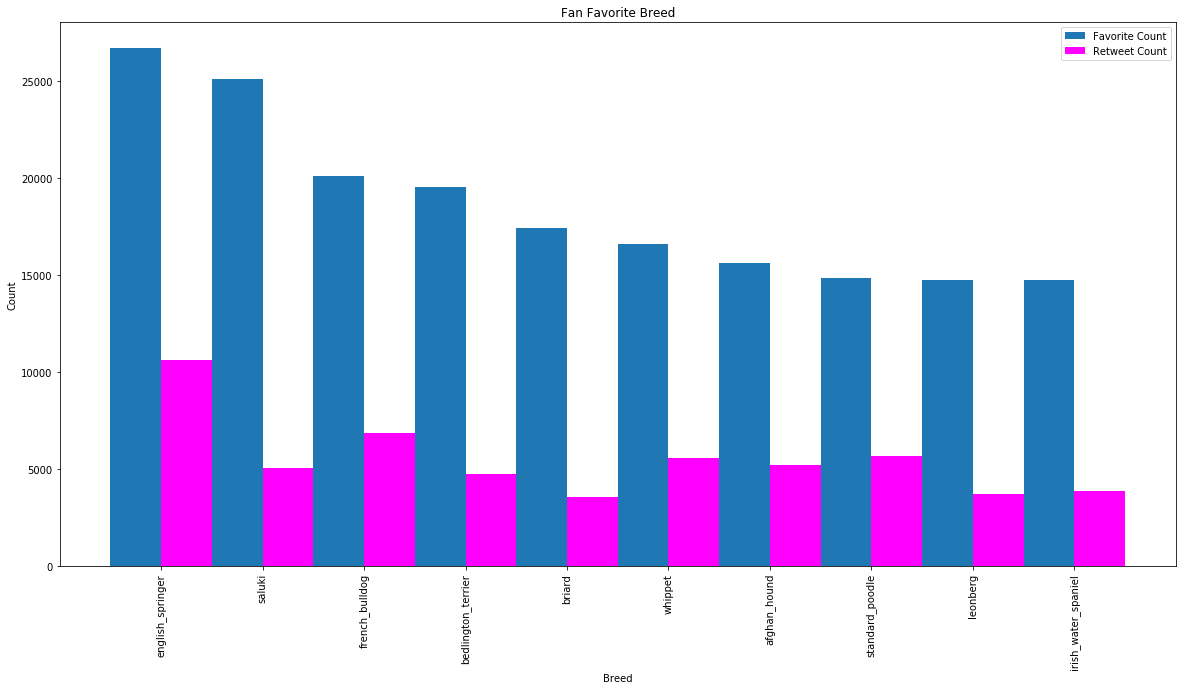

In [49]:
#line up breed data
labels = ['english_springer', 'saluki', 'french_bulldog', 'bedlington_terrier', 'briard', 'whippet', 'afghan_hound', 'standard_poodle', 'leonberg', 'irish_water_spaniel']

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = matplot.subplots(figsize=(20,10))

rects1 = ax.bar(x - width/2, (fan_fave['favorite_count']), width, label='Favorite Count')
rects2 = ax.bar(x + width/2, (fan_fave['retweet_count']), width, label='Retweet Count', color='magenta')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Breed')
ax.set_title('Fan Favorite Breed')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

matplot.show()

In [50]:
rater_fave = favorite_breed.nlargest(10, 'rating')
rater_fave

,tweet_id,rating,retweet_count,favorite_count,img_num
predicted_breed,,,,,
bedlington_terrier,8.444531e+17,1.350000,3563.500000,17412.500000,1.000000
afghan_hound,8.173006e+17,1.300000,6863.000000,20114.000000,1.000000
appenzeller,8.909719e+17,1.300000,1810.000000,10878.000000,1.000000
border_terrier,8.078935e+17,1.233333,3337.333333,14034.000000,1.000000
borzoi,7.574342e+17,1.233333,2945.666667,10806.000000,1.333333
saluki,8.363467e+17,1.233333,5036.000000,25093.333333,1.000000
briard,7.823059e+17,1.200000,5548.000000,16609.000000,1.000000
irish_setter,8.056129e+17,1.200000,3714.333333,11861.333333,1.000000
silky_terrier,7.737047e+17,1.200000,1617.000000,6567.000000,2.000000


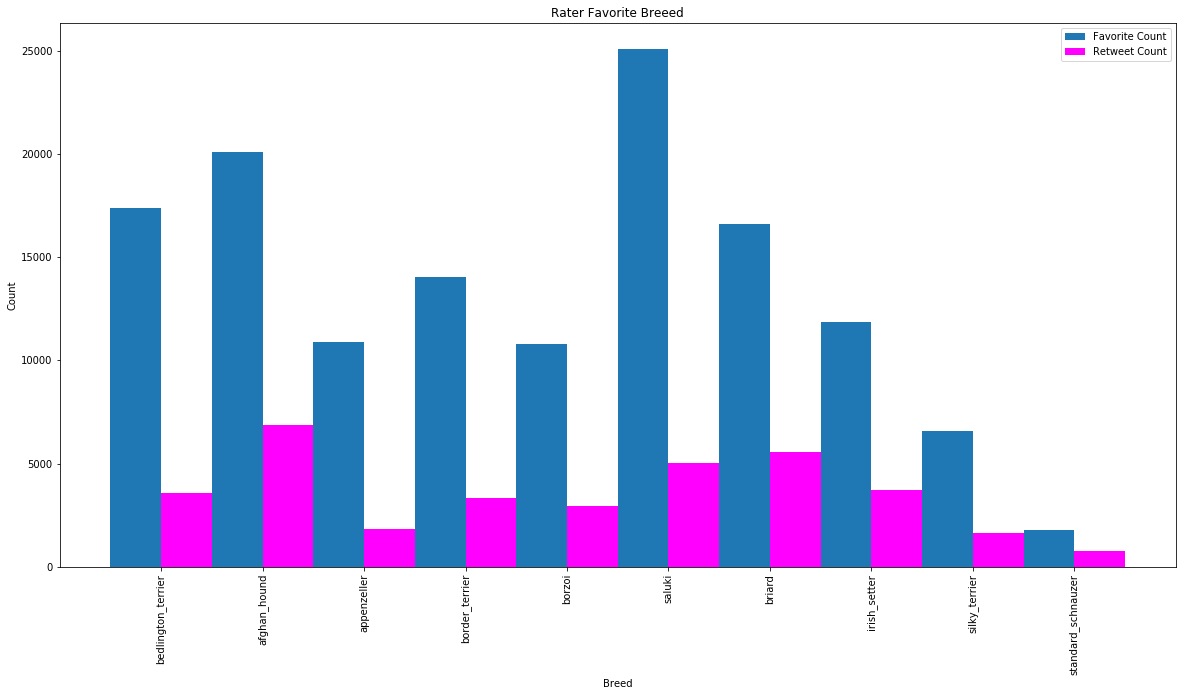

In [51]:
#line up breed data
labels = ['bedlington_terrier', 'afghan_hound', 'appenzeller', 'border_terrier', 'borzoi', 'saluki', 'briard', 'irish_setter', 'silky_terrier', 'standard_schnauzer']

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = matplot.subplots(figsize=(20,10))

rects1 = ax.bar(x - width/2, (rater_fave['favorite_count']), width, label='Favorite Count')
rects2 = ax.bar(x + width/2, (rater_fave['retweet_count']), width, label='Retweet Count', color='magenta')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Breed')
ax.set_title('Rater Favorite Breeed')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

matplot.show()

Only Afghan Hounds, Salukis, and Briards are favorites of both the raters and the fans!

In [52]:
dog_name = we_rate_dogs_clean.groupby(['name']).mean()
dog_name.head()

,tweet_id,rating,retweet_count,favorite_count,img_num
name,,,,,
Abby,7.458612e+17,1.05,1178.5,4432.0,1.0
Ace,7.532945e+17,1.10,1023.0,3323.0,1.0
Acro,6.740193e+17,1.00,287.0,1073.0,1.0
Adele,7.059751e+17,1.00,715.0,3038.0,1.0
Aiden,6.740144e+17,1.10,604.0,1479.0,1.0


In [53]:
fan_fave_name = dog_name.nlargest(10, 'favorite_count')
fan_fave_name

,tweet_id,rating,retweet_count,favorite_count,img_num
name,,,,,
Stephan,8.071068e+17,1.3,55514.0,118488.0,1.0
Jamesy,8.664507e+17,1.3,32338.0,114563.0,2.0
Duddles,8.794158e+17,1.3,39904.0,97697.0,1.0
Aja,8.777365e+17,1.3,16974.0,73217.0,2.0
Lilly,8.305833e+17,1.3,16536.0,66128.0,1.0
Canela,8.874740e+17,1.3,16095.0,63396.0,2.0
Pipsy,6.671522e+17,1.2,15689.0,44751.0,1.0
Barney,8.465141e+17,1.3,11161.0,43454.0,2.0
Seamus,8.083449e+17,1.1,20912.0,42692.0,NaN


In [54]:
rater_fave_name = dog_name.nlargest(10, 'rating')
rater_fave_name

,tweet_id,rating,retweet_count,favorite_count,img_num
name,,,,,
Cermet,8.562820e+17,1.4,5929.0,26477.0,4.0
Clifford,8.700632e+17,1.4,7562.0,34072.0,NaN
Doobert,8.283816e+17,1.4,2193.0,12481.0,1.0
Emmy,8.780576e+17,1.4,6097.0,38923.0,1.0
General,8.522261e+17,1.4,6558.0,19327.0,NaN
Iggy,8.514648e+17,1.4,6772.0,23466.0,NaN
Laika,7.942053e+17,1.4,3331.0,9250.0,NaN
Smiley,8.322734e+17,1.4,2305.0,11225.0,1.0
Sundance,8.214072e+17,1.4,4316.0,11709.0,1.0


In [55]:
favorite_names = pd.merge(fan_fave_name, rater_fave_name, on='name', how='inner')
favorite_names

,tweet_id_x,rating_x,retweet_count_x,favorite_count_x,img_num_x,tweet_id_y,rating_y,retweet_count_y,favorite_count_y,img_num_y
name,,,,,,,,,,
Aja,8.777365e+17,1.3,16974.0,73217.0,2.0,8.777365e+17,1.3,16974.0,73217.0,2.0


In [56]:
favorite_names_df = we_rate_dogs_clean.loc[(we_rate_dogs_clean['name'] == 'Aja')]
favorite_names_df

,tweet_id,timestamp,source,text,name,rating,dog_stage_1,dog_stage_2,url1,url2,url3,url4,url5,retweet_count,favorite_count,jpg_url,img_num,predicted_breed
52,877736472329191424,2017-06-22 03:54:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,Aja,1.3,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,https://twitter.com/dog_rates/status/877736472...,NaN,NaN,NaN,16974,73217,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2.0,chesapeake_bay_retriever


Aja is the most popular name, appearing on both the rater's top 10 and the fan's top 10.  And Aja is surprisingly *not* one of the favorite breeds.

In [57]:
#what common dog names are also fan favorites?
common_dog_name = we_rate_dogs_clean.groupby(['name']).sum()
common_dog_name = common_dog_name.nlargest(10, 'rating')
common_dog_name

,tweet_id,rating,retweet_count,favorite_count,img_num
name,,,,,
Oliver,7557960543565385728,11.3,16763,67922,14.0
Cooper,7588833830704640000,11.3,16164,62233,11.0
Lucy,7361393920789508096,10.9,26095,80444,9.0
Charlie,6872132794446442496,10.3,19735,80200,12.0
Tucker,6262410960107323392,9.6,16612,69214,9.0
Penny,6788916199415394304,9.6,27401,92516,9.0
Lola,5914217200292859904,8.9,14950,54835,7.0
Winston,6044656128073568256,8.4,18487,71077,8.0
Daisy,5332716112110784512,8.3,14915,60403,9.0


In [58]:
fave_common_dog = pd.merge(fan_fave_name, common_dog_name, on='name', how='inner')
fave_common_dog

,tweet_id_x,rating_x,retweet_count_x,favorite_count_x,img_num_x,tweet_id_y,rating_y,retweet_count_y,favorite_count_y,img_num_y
name,,,,,,,,,,


None of the more common dog names are favorite dogs!

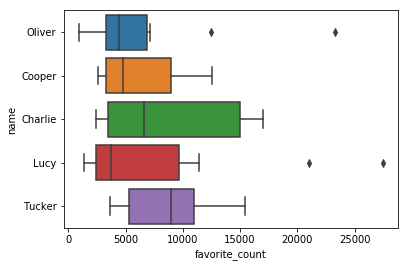

In [59]:
top_common_name = we_rate_dogs_clean.loc[((we_rate_dogs_clean['name'] == 'Oliver')) | ((we_rate_dogs_clean['name'] == 'Cooper')) | ((we_rate_dogs_clean['name'] == 'Charlie')) | ((we_rate_dogs_clean['name'] == 'Lucy')) | ((we_rate_dogs_clean['name'] == 'Tucker'))]
sns.boxplot(x = 'favorite_count', y = 'name', data = top_common_name);

In [60]:
dog_stage = we_rate_dogs_clean.groupby(['dog_stage_1']).mean()
dog_stage = dog_stage.reset_index()
dog_stage

,dog_stage_1,tweet_id,rating,retweet_count,favorite_count,img_num
0,Doggo,8.052339e+17,1.186047,4293.720930,14959.279070,1.216216
1,Floofer,7.704392e+17,1.160000,1950.800000,8625.800000,1.200000
2,Pupper,7.265788e+17,1.060235,2046.200000,7244.260870,1.308511
3,Puppo,8.172364e+17,1.189474,3530.105263,13895.526316,1.333333


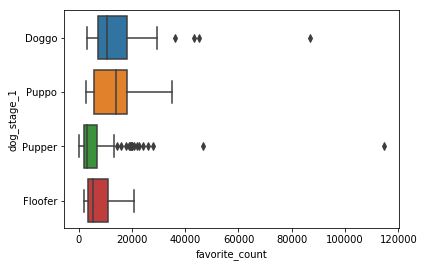

In [61]:
top_dog_stage = we_rate_dogs_clean.loc[((we_rate_dogs_clean['dog_stage_1'] == 'Doggo')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Floofer')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Pupper')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Puppo'))]
sns.boxplot(x = 'favorite_count', y = 'dog_stage_1', data = top_dog_stage);

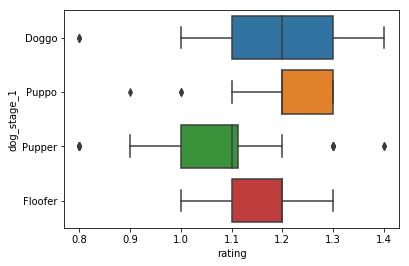

In [62]:
top_dog_stage = we_rate_dogs_clean.loc[((we_rate_dogs_clean['dog_stage_1'] == 'Doggo')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Floofer')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Pupper')) | ((we_rate_dogs_clean['dog_stage_1'] == 'Puppo'))]
sns.boxplot(x = 'rating', y = 'dog_stage_1', data = top_dog_stage);

Both the rater and the fans love their 'doggos'!

In [63]:
doggos_df = we_rate_dogs_clean.loc[(we_rate_dogs_clean['dog_stage_1'] == 'Doggo')]
doggos_df

,tweet_id,timestamp,source,text,name,rating,dog_stage_1,dog_stage_2,url1,url2,url3,url4,url5,retweet_count,favorite_count,jpg_url,img_num,predicted_breed
7,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,1.4,Doggo,NaN,https://twitter.com/dog_rates/status/890240255...,NaN,NaN,NaN,NaN,6560,29402,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke
29,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,Yogi,1.2,Doggo,NaN,https://twitter.com/dog_rates/status/884162670...,NaN,NaN,NaN,NaN,2678,18843,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,german_shepherd
69,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,Napolean,1.2,Doggo,NaN,https://twitter.com/dog_rates/status/871515927...,https://twitter.com/dog_rates/status/871515927...,NaN,NaN,NaN,3151,18765,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2.0,komondor
77,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,Scout,1.2,Doggo,NaN,https://twitter.com/dog_rates/status/869596645...,https://twitter.com/dog_rates/status/869596645...,NaN,NaN,NaN,2843,14914,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1.0,chihuahua
139,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,Barney,1.3,Doggo,NaN,https://twitter.com/dog_rates/status/846514051...,https://twitter.com/dog_rates/status/846514051...,https://twitter.com/dog_rates/status/846514051...,NaN,NaN,11161,43454,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,golden_retriever
142,845397057150107648,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,Mimosa,1.3,Doggo,NaN,https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057...,https://twitter.com/dog_rates/status/845397057...,NaN,NaN,1735,7458,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1.0,dandie_dinmont
169,836753516572119041,2017-03-01 01:42:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,Meera,1.2,Doggo,NaN,https://twitter.com/dog_rates/status/836753516...,NaN,NaN,NaN,NaN,4558,19071,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1.0,schipperke
186,832998151111966721,2017-02-18 17:00:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,Rhino,1.3,Doggo,NaN,https://twitter.com/dog_rates/status/832998151...,https://twitter.com/dog_rates/status/832998151...,NaN,NaN,NaN,2167,13095,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1.0,boxer
191,832273440279240704,2017-02-16 17:00:25,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,Smiley,1.4,Doggo,NaN,https://twitter.com/dog_rates/status/832273440...,NaN,NaN,NaN,NaN,2305,11225,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1.0,pembroke
192,832032802820481025,2017-02-16 01:04:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,Miguel,1.2,Doggo,NaN,https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802...,https://twitter.com/dog_rates/status/832032802...,https://twitter.com/dog_rates/status/832032802...,https://twitter.com/dog_rates/status/832032802...,4603,17674,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1.0,whippet


In [64]:
favorite_doggo_breed = doggos_df.groupby(['predicted_breed']).mean()
fan_fave_doggo = favorite_doggo_breed.nlargest(10, 'favorite_count')
fan_fave_doggo

,tweet_id,rating,retweet_count,favorite_count,img_num
predicted_breed,,,,,
standard_poodle,8.190048e+17,1.400000,36763.000000,86717.0,1.000000
great_pyrenees,8.268488e+17,1.300000,10047.000000,36032.0,4.000000
pomeranian,8.319398e+17,1.200000,6048.000000,23722.0,1.000000
pembroke,8.612568e+17,1.400000,4432.500000,20313.5,1.000000
schipperke,8.367535e+17,1.200000,4558.000000,19071.0,1.000000
komondor,8.715159e+17,1.200000,3151.000000,18765.0,2.000000
german_shepherd,8.553197e+17,1.200000,3413.500000,18551.5,1.000000
whippet,8.320328e+17,1.200000,4603.000000,17674.0,1.000000
briard,7.823059e+17,1.200000,5548.000000,16609.0,1.000000


Looking back at the fan favorite breeds too, Briard doggos are amazing apparently.

In [65]:
favorite_doggo_name = doggos_df.groupby(['name']).mean()
fan_fave_doggo_name = favorite_doggo_name.nlargest(10, 'favorite_count')
fan_fave_doggo_name

,tweet_id,rating,retweet_count,favorite_count,img_num
name,,,,,
Bo,819004803107983360,1.4,36763,86717,1.0
Sunny,819006400881917952,1.4,18930,45183,NaN
Barney,846514051647705088,1.3,11161,43454,2.0
Cupid,826848821049180160,1.3,10047,36032,4.0
Cassie,890240255349198848,1.4,6560,29402,1.0
Emanuel,831939777352105984,1.2,6048,23722,1.0
Loki,826958653328592896,1.2,4936,21415,1.0
Meera,836753516572119040,1.2,4558,19071,1.0
Yogi,884162670584377344,1.2,2678,18843,1.0


In [66]:
doggo_favorite_names = pd.merge(fan_fave_name, fan_fave_doggo_name, on='name', how='inner')
doggo_favorite_names

,tweet_id_x,rating_x,retweet_count_x,favorite_count_x,img_num_x,tweet_id_y,rating_y,retweet_count_y,favorite_count_y,img_num_y
name,,,,,,,,,,
Barney,8.465141e+17,1.3,11161.0,43454.0,2.0,846514051647705088,1.3,11161,43454,2.0


In [67]:
Barney_df = we_rate_dogs_clean.loc[(we_rate_dogs_clean['name'] == 'Barney')]
Barney_df

,tweet_id,timestamp,source,text,name,rating,dog_stage_1,dog_stage_2,url1,url2,url3,url4,url5,retweet_count,favorite_count,jpg_url,img_num,predicted_breed
139,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,Barney,1.3,Doggo,NaN,https://twitter.com/dog_rates/status/846514051...,https://twitter.com/dog_rates/status/846514051...,https://twitter.com/dog_rates/status/846514051...,NaN,NaN,11161,43454,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,golden_retriever


There's just one Barney and he was a popular enough Doggo to make our fan favorite names and Doggo favorite names.

In [68]:
image_qty = we_rate_dogs_clean.groupby(['img_num']).mean()
image_qty

,tweet_id,rating,retweet_count,favorite_count
img_num,,,,
1.0,7.446564e+17,1.098232,2292.739270,8351.861588
2.0,7.747481e+17,1.152137,3483.871795,12710.435897
3.0,7.817181e+17,1.180645,3283.677419,11527.580645
4.0,7.923581e+17,1.190909,3465.090909,12589.590909


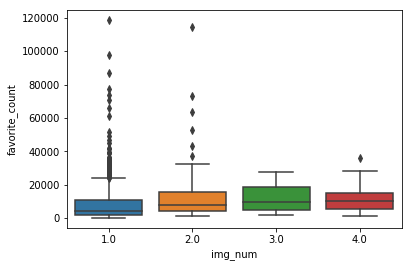

In [69]:
sns.boxplot(x = 'img_num', y = 'favorite_count', data = we_rate_dogs_clean);

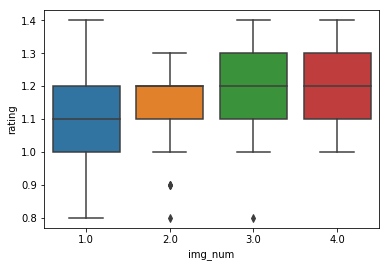

In [70]:
sns.boxplot(x = 'img_num', y = 'rating', data = we_rate_dogs_clean);

Having more images appears to positively impact a tweet's rating and favorite count.

In [ ]:
we_rate_dogs_clean['timestamp'] = pd.to_datetime(we_rate_dogs_clean['timestamp'], errors = 'coerce', format = "%Y-%m-%d")
we_rate_dogs_clean.groupby([we_rate_dogs_clean["timestamp"].dt.year,
we_rate_dogs_clean["timestamp"].dt.month])["retweet_count"].sum().plot('line')
we_rate_dogs_clean.groupby([we_rate_dogs_clean["timestamp"].dt.year,
we_rate_dogs_clean["timestamp"].dt.month])["favorite_count"].sum().plot('line')
matplot.title('Retweets and Favorites Over Time', size =20)
matplot.ylabel('Tweet Count')
matplot.xlabel('Time')
matplot.legend(('Retweet Count', 'Favorite Count'), fontsize=14)
matplot.show()